In [1]:
import sys
sys.path.append("/Users/ernest/Documents/PythonPackageErnest/lppack2")

import ladderpath_dev as lp
import ladderpath_tools.compress as lp_c
import ladderpath_tools.phylo as lp_p

import pandas as pd

In [2]:
# strs = ['acsccsaascascaaaacssscscscasasacssacssaaaacsccsaascascaaaacssscscscasasacssacssaaa']
strs = ['ABCDBCDBCDCDEFEF', 'AA', 'AA', 'DBCDBCA', 'BCDCDAEF','AA', 'DBCDBCA', 'AAAA']
# strs = ['ABCDBCDBCDCDEFEF', 'AA', 'DBCDBCA', 'BCDCDAEF', 'DBCDBCA', 'AAAA']
# strs = ['ABCDBCDBCDCDEFEF', 'AA', 'AA', 'DBCDBCA', 'BCDCDAEF','AA', 'AAAA']
# strs = ['ABCDBCDBCDCDEFEF', 'AA', 'DBCDBCA', 'BCDCDAEF']
# strs = ['DDDCC']

# with open('sequences.txt', 'r', encoding='utf-8') as file:
#     strs = [file.read()]

In [3]:
# lpjson = lp.get_ladderpath(strs, estimate_eta = True, estimate_eta_para = [10, 'global'], 
#                            save_file_name=None, show_version=False)
# lpjson = lp.get_ladderpath(strs, save_file_name='Data/new_lpjson', show_version=False)
lpjson = lp.get_ladderpath(strs, save_file_name=None, show_version=False)
lpjson

{'info': 'V1.0.1.20240928_Alpha',
 'ladderpath-index': 25,
 'order-index': 23,
 'size-index': 48,
 'eta': None,
 'ladderons': {0: [[1, 1], 6, '', {-1: [3], 6: [0]}],
  1: [['D', 4], 3, '', {0: [0, 3]}],
  2: [['DCD'], 3, '', {-4: [2], -1: [9]}],
  3: [['AA'], 2, '', {-2: [0], -5: [0, 2]}],
  4: [['BC'], 2, '', {-1: [1], -4: [0], 1: [1]}],
  5: [['EF'], 2, '', {-1: [12, 14], -4: [6]}],
  6: [[0, 'A'], 7, '', {-3: [0]}]},
 'basic_building_blocks': ['A', 'D', 'C', 'B', 'E', 'F'],
 'targets': {-1: [['A', 4, 0, 2, 5, 5], 16, '', 1],
  -2: [[3], 2, '', 3],
  -3: [[6], 7, '', 2],
  -4: [[4, 2, 'A', 5], 8, '', 1],
  -5: [[3, 3], 4, '', 1]},
 'duplications_info': {-2: [1, 2, 5], -3: [3, 6]},
 'eta_info': {'omega_max_AllIdentical': None,
  'omega_max_Sorted': None,
  'omega_min_Shuffle_list': [],
  'omega_min_LocalDist_list': [],
  'omega_min_EvenDist_list': []}}

In [4]:
# 读取JSON文件（会将dict的key转换成数字）
# lpjson = lp.load_ladderpath_json('new_lpjson.json')
# lpjson

In [5]:
# lp.clear_lpjson_STR(lpjson) # 清空JSON中每个梯元STR的显式表示（清空缓存）
# lp.fill_lpjson_STR(lpjson) # 填满JSON中每个梯元STR的显式表示（填满缓存）
# lpjson

In [6]:
index3 = lp.disp3index(lpjson)

pom, pom_str = lp.POM_from_JSON(lpjson, display_str=True)

( Ladderpath-index:25,  Order-index:23,  Size-index:48 )
{ A(5), D(3), C(2), B, E, F // AA(4), EF(2), BC(2), DCD // DBC // DBCDBC // DBCDBCA }


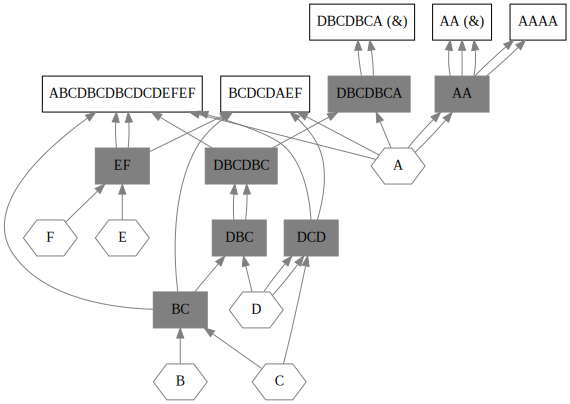

In [7]:
# ellipse, box, box-OnlyShowTargetID
# "figs/New_Laddergraph"
g = lp.draw_laddergraph(lpjson, show_longer_than = 0, style = "box", 
                        warning_n_ladderons_to_show = 500, rankdir = "BT", color = "grey", 
                        save_fig_name = None, figformat = "pdf", cleanGVfile=True)
g

# 计算eta

In [8]:
# 如果eta存在，则取出；如果不存在，则计算
lp.get_eta(lpjson, estimate_eta_para=[10, 'global'])

0.4375

In [9]:
# 更新eta值，即多增加N_omega_min次计算omega_min
lp.update_eta(lpjson, estimate_eta_para=[10, 'global'])
lp.get_eta(lpjson)

0.4375

# 利用梯径进行压缩

In [10]:
compressed_list = lp_c.compress(lpjson, display=True, SEP='@')

[8, '@', 'A', 2, 6, 4, 1, 1, '@', 3, '@', 3, '@', 0, '@', 2, 4, 'A', 1, '@', 3, '@', 0, '@', 3, 3, '@', 6, 'A', '@', 'EF', '@', 'BC', '@', 'AA', '@', 'DCD', '@', 'D', 2, '@', 5, 5]


In [11]:
decompressed_strs = lp_c.decompressed(compressed_list, display=True)

['ABCDBCDBCDCDEFEF', 'AA', 'AA', 'DBCDBCA', 'BCDCDAEF', 'AA', 'DBCDBCA', 'AAAA']


# 画系统发生树

In [12]:
# 需要事先去掉targets中的重复序列
strs_unique, duplications_info = lp.uniquenize(strs)
strs_unique

['ABCDBCDBCDCDEFEF', 'AA', 'DBCDBCA', 'BCDCDAEF', 'AAAA']

In [13]:
lp_dis_mat = lp_p.LADDERPATH_DISTANCE_MATRIX(strs_unique, strsNames=None)

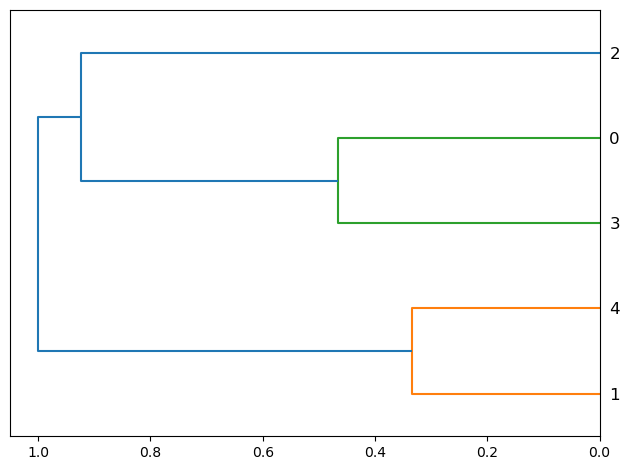

In [14]:
lp_dis_mat.phylotree(save_fig_name=None, figformat='pdf')

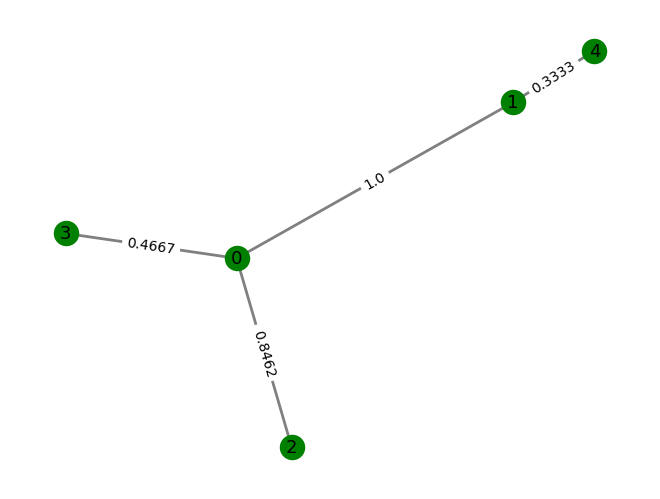

In [15]:
lp_dis_mat.minimum_spanning_tree(save_fig_name=None, figformat='pdf', show_weights=True)